In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/train.csv')

In [3]:
train_data['Sex'] = train_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [4]:
train_data['Fare'] = preprocessing.normalize(train_data['Fare'].to_numpy().reshape(-1, 1))

In [5]:
# train_data_normalized = preprocessing.normalize(train_data[['Fare', 'Sex']])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_data[['Fare', 'Sex']], 
    train_data['Survived'], 
    test_size=0.33, 
    random_state=42,
    stratify=train_data['Survived'])

In [7]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train.to_numpy())

In [8]:
clf.predict([[0,1]])[0]

C:\Users\caioo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [9]:
y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)

In [10]:
accuracy_score(y_train, y_train_predict, normalize=False), len(y_train_predict)

(470, 596)

In [11]:
accuracy_score(y_test, y_test_predict, normalize=False), len(y_test_predict)

(231, 295)

In [12]:
confusion_matrix(y_test, y_test_predict)

array([[155,  27],
       [ 37,  76]], dtype=int64)

C:\Users\caioo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


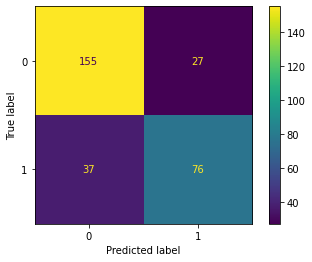

In [13]:
plot_confusion_matrix(clf, X_test, y_test) 
plt.show()